<a href="https://colab.research.google.com/github/ZainabAbuTaha/Prediction-of-Product-Sales/blob/main/project1_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Zainab Abu Taha

# Load and Inspect Data


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Clean Data

How many rows and columns?

In [ ]:
df.shape

(8523, 12)

- There are 8523 rows, and 12 columns

What are the datatypes of each variable?

In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


-

Object type for->Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type

Numeric type for-> Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales

Are there duplicates? If so, drop any duplicates.

In [ ]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate rows in your dataset

 Identify missing values

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


- Item_Weight → 1463 missing values

- Outlet_Size → 2410 missing values

- All other columns → 0 missing values

Address the missing values by using a placeholder value.

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df['Item_Weight']=df['Item_Weight'].fillna(-1)

- We handle Missing value

Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


- There is no missing value

Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).



In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})
df['Item_Fat_Content']

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


- We handle inconsistent in Item_Fat_Content, there is no other value need to hadle in dataset

For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
numeric_cols = df.select_dtypes(include='number')
summary = numeric_cols.agg(['min', 'max', 'mean'])
summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
hist_col=df.select_dtypes('number').columns.tolist()

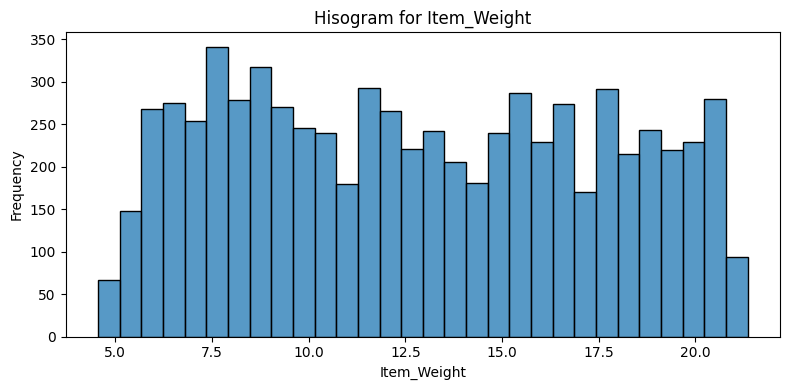

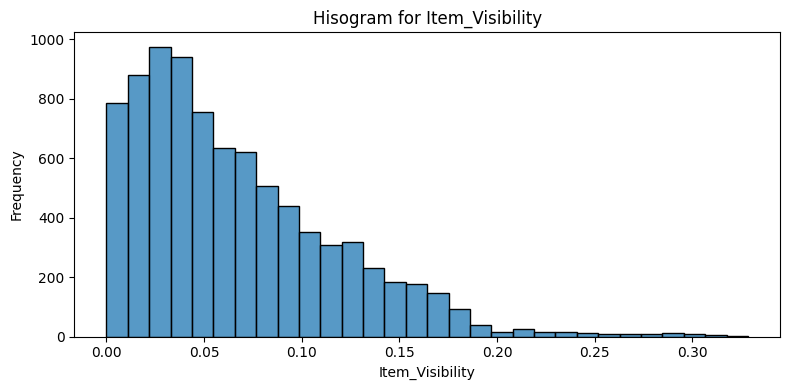

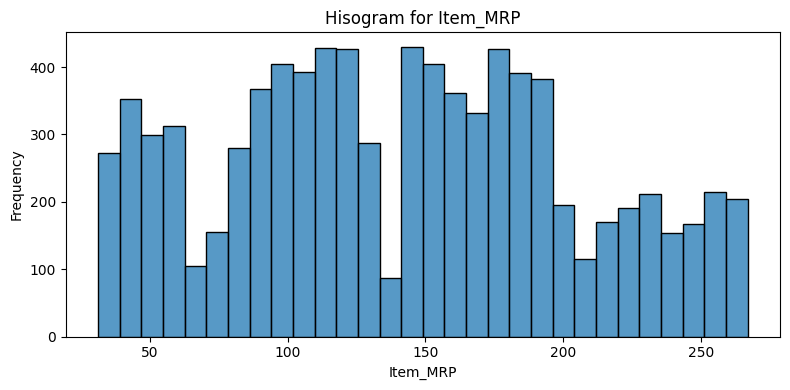

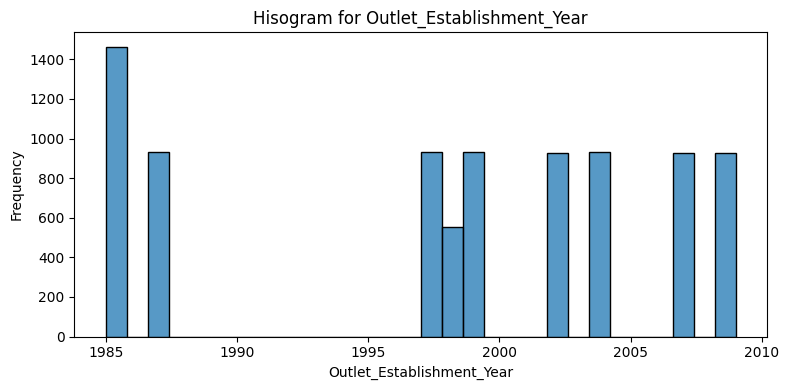

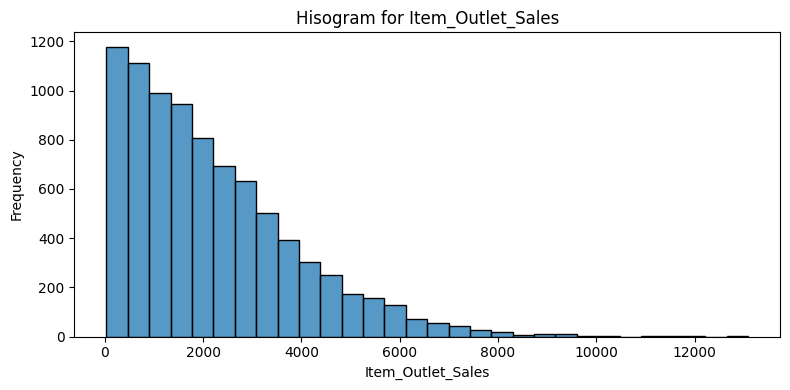

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
for my_hist in hist_col:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df,x=my_hist,bins=30);
  plt.title(f"Hisogram for {my_hist}");
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

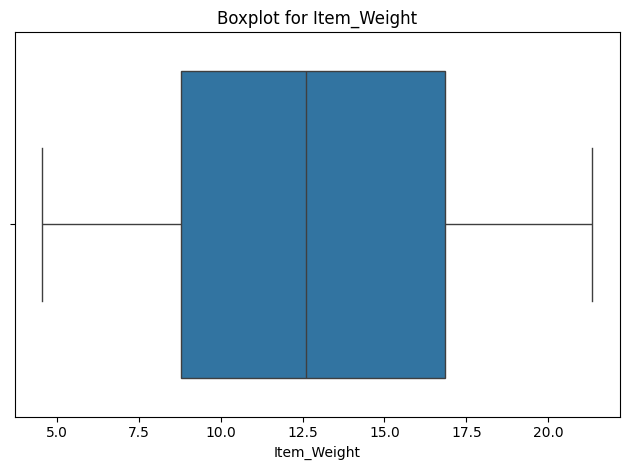

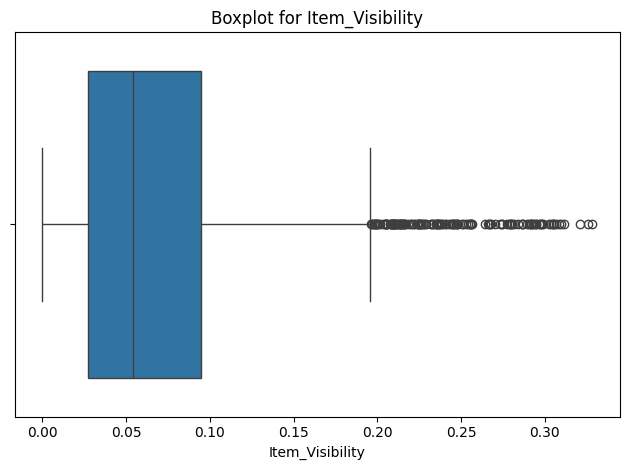

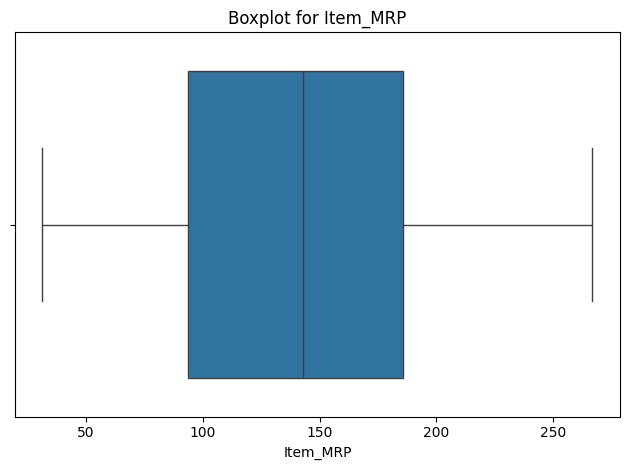

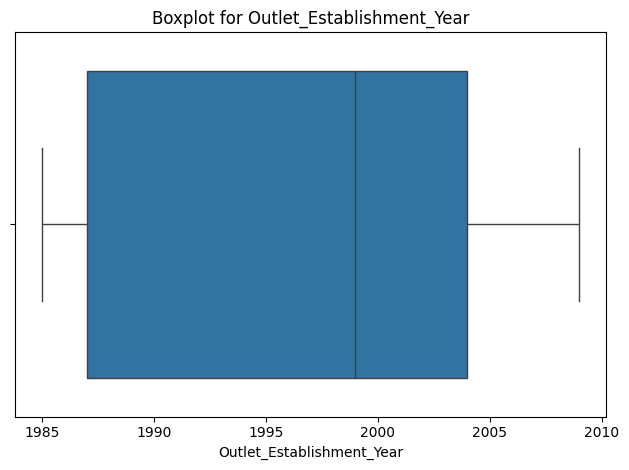

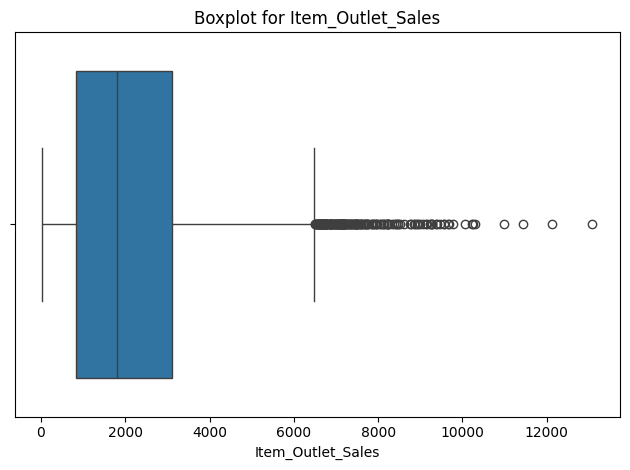

In [35]:
my_boxplot=df.select_dtypes('number').columns.tolist()
for box_col in my_boxplot:
  sns.boxplot(data=df,x=box_col);
  plt.title(f"Boxplot for {box_col}");
  plt.tight_layout()
  plt.show()

In [13]:
df.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

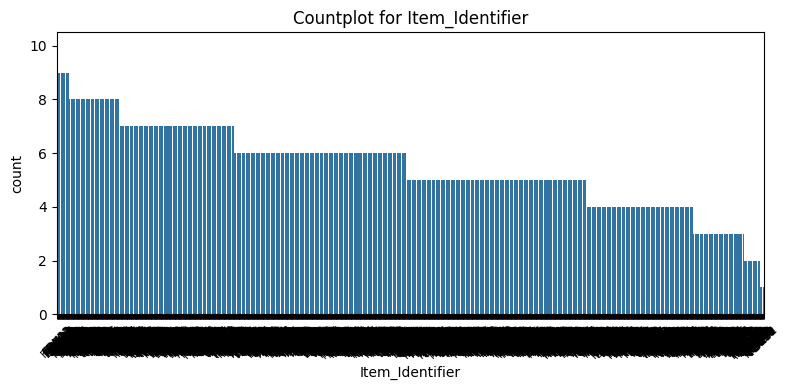

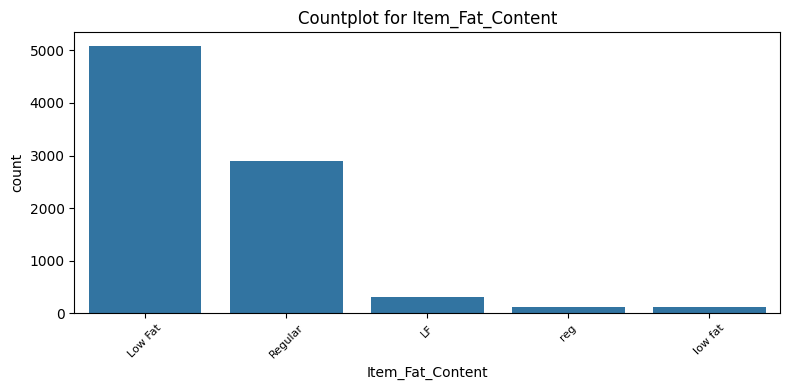

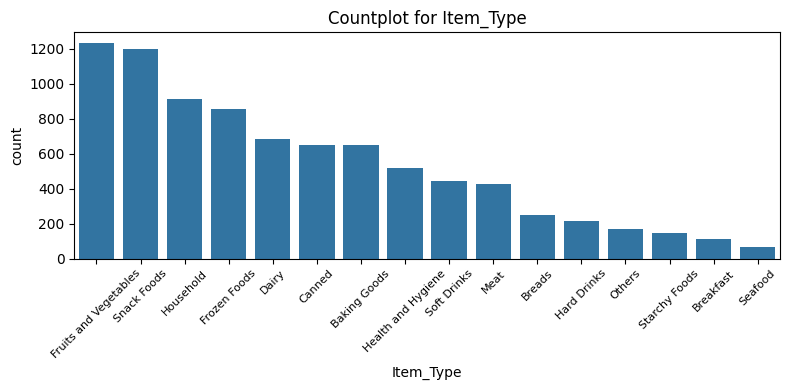

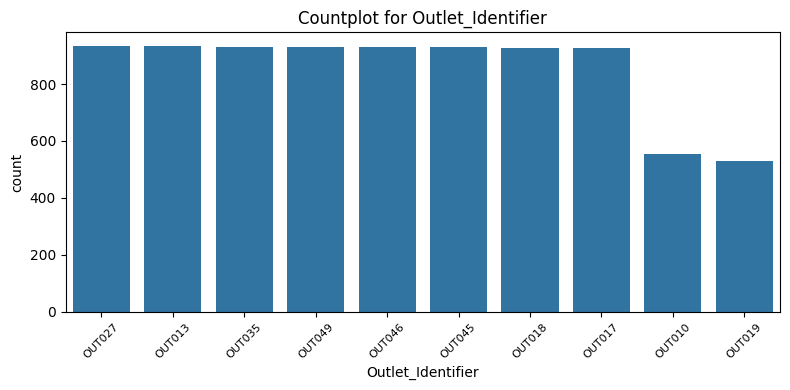

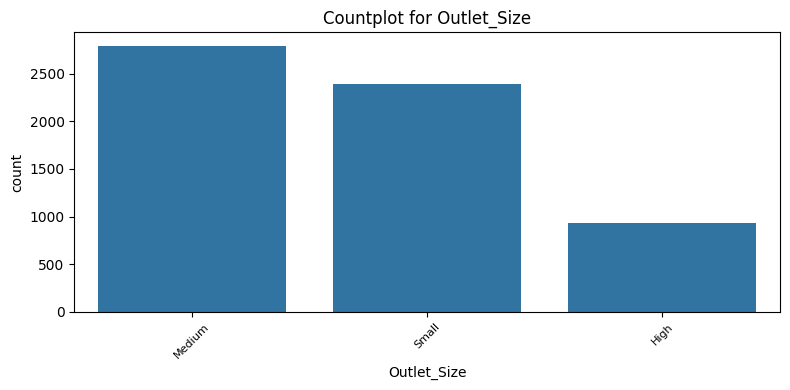

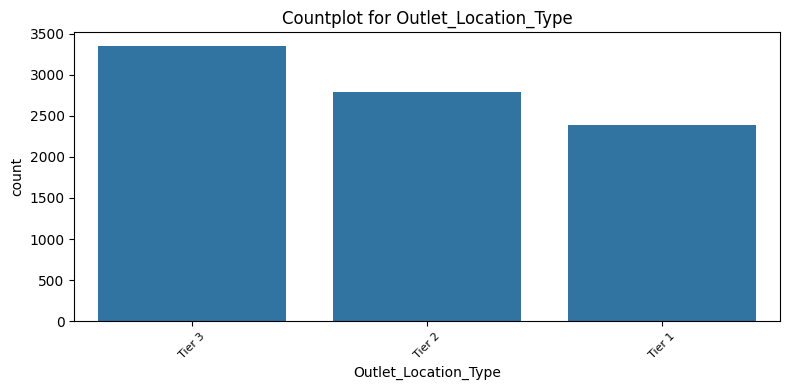

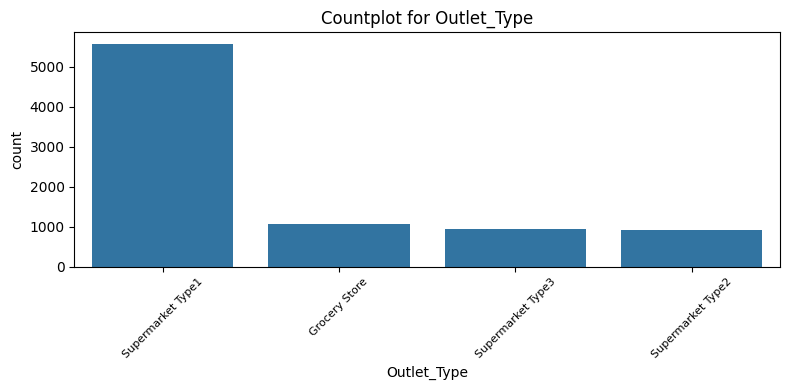

In [39]:
countplot_col=df.select_dtypes('object').columns.tolist()
for countplot_col in countplot_col:
  plt.figure(figsize=(8,4))
  ax=sns.countplot(data=df,x=countplot_col,order=df[countplot_col].value_counts().index);
  ax.set_title(f"Countplot for {countplot_col}");
  plt.xticks(rotation=45, fontsize=8)
  plt.tight_layout()
  plt.show()

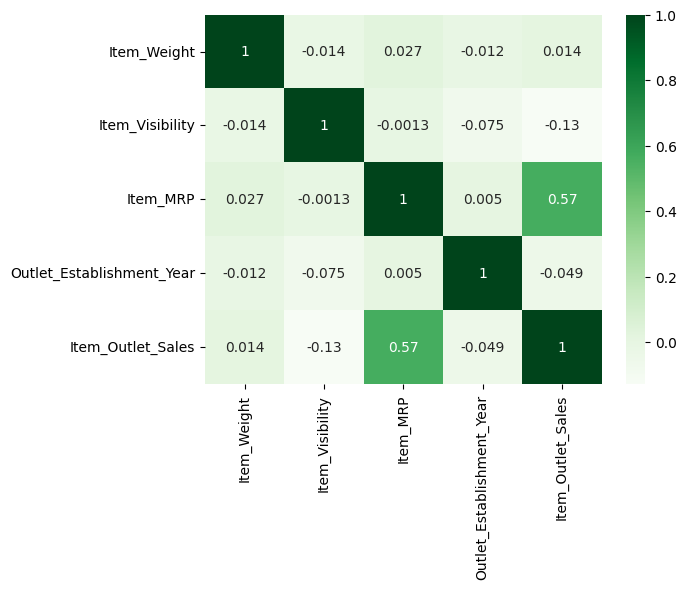

In [42]:
corr=df.corr(numeric_only=True)
corr.round(2)
sns.heatmap(corr,cmap="Greens",annot=True);